In [3]:
pip install matplotlib, pandas, openpyxl, scikit-learn, plotly, --upgrade nbformat

ERROR: Invalid requirement: 'matplotlib,'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'matplotlib,'


In [4]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Dimensionality Reduction: Principal Component Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [6]:
# Convert boolean array to numpy.uint8
bool_array = np.array([True, False, True])
uint8_array = bool_array.astype(np.uint8)

In [7]:
encoded_data = pd.read_excel('Datasets/Encoded_Data_for_Model_Training_long.xlsx')

In [8]:
encoded_data.head(3)

,age,income,gender_female,gender_male,gender_non binary,ethnicity_hispanic,ethnicity_non hispanic,race_Colombia,race_Mexican,race_Puerto Rican,...,language_both,language_english,language_spanish,language_undisclosed,disability_i do not have a disability,disability_undisclosed,choice_Empathetic,choice_Original,choice_Persuasive,choice_Simplier
0,3,1,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,0,0,False,True,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,0,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [9]:
encoded_data.shape

(400, 45)

## Standardize the data

In [10]:
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded_data)


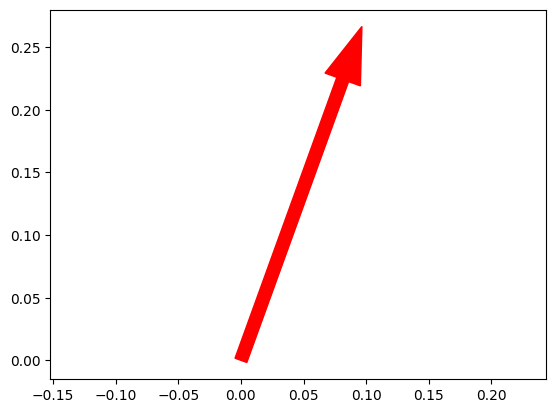

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(encoded_scaled)
# Calculate the mean of the data
mean = np.mean(encoded_scaled, axis=0) 

# Assuming 'pca' is your PCA object
first_pc = pca.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on the same scale
plt.axis('equal')
plt.show()


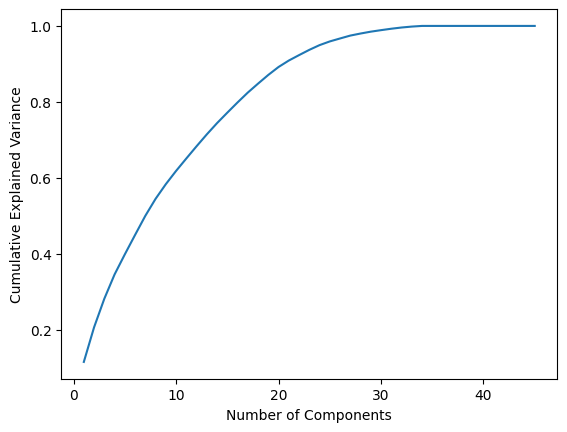

In [12]:
pca = PCA()
pca.fit(encoded_scaled)
# Elbow method to determine optinal number of components
# Proportion of variance explained criterion
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

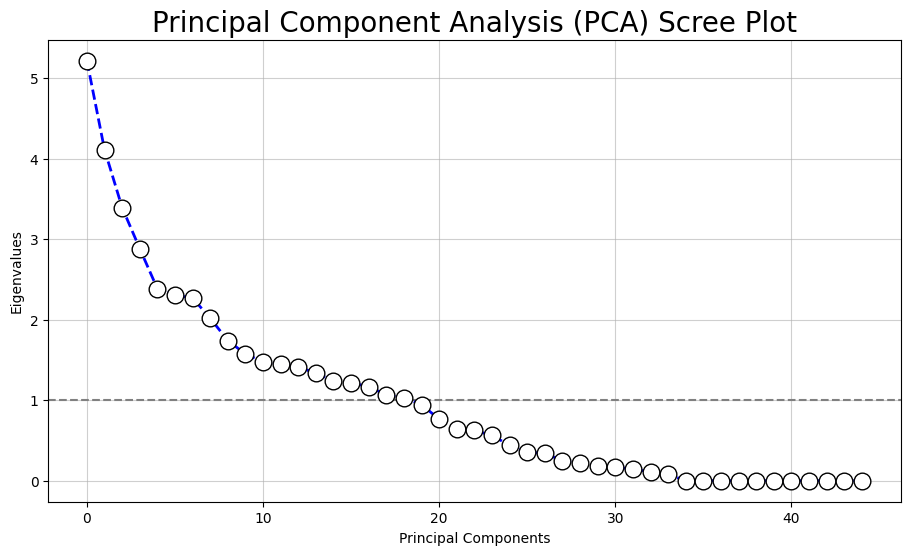

In [13]:
# Scree plot criterion for selecting principal components
covar_matrix = PCA(n_components = len(encoded_data.columns))
covar_matrix.fit(encoded_scaled)

# visualizing the eigenvalues obtained from performing Principal Component Analysis (PCA) on the dataset and identifying significant components based on a threshold (in this case, eigenvalues greater than 1) 
# Once a principal component's eigenvalue is on or below the threshold, it suggests that the corresponding principal component may not explain a significant amount of variance in the data

fig, ax = plt.subplots(figsize=(11, 6)) 

plt.ylabel('Eigenvalues')
plt.xlabel('Principal Components')
plt.title('Principal Component Analysis (PCA) Scree Plot', fontsize=20)
plt.style.context('seaborn-whitegrid')

# plt.xticks(range(len(covar_matrix.explained_variance_)))
for x_position in range(len(covar_matrix.explained_variance_)):
    plt.scatter(x_position, covar_matrix.explained_variance_[x_position])

plt.axhline(y=1, color='gray', linestyle='--')
plt.plot(covar_matrix.explained_variance_, color='blue', marker='o', linestyle='--', linewidth=2, markersize=12, markerfacecolor='white', markeredgecolor='black')

plt.grid(True, linestyle='-', alpha=0.6)
plt.savefig('main/PCA_Scree_Plot.png')
plt.show()


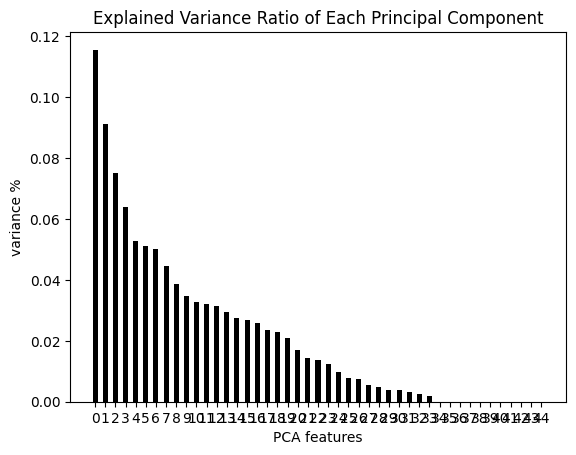

In [14]:
# the explained variance ratio of each principal component obtained from PCA-variance drop off point is 3
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black', width=0.5)
plt.title("Explained Variance Ratio of Each Principal Component")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# plt.savefig('PCA_Features.png')
plt.show()

## Train PCA model with number of principal components

In [15]:
# PCA Implementation w the optimal # of components
pca = PCA(n_components = 3)
pca.fit(encoded_scaled)
pca_features = pca.transform(encoded_scaled)

In [16]:
print(pca.explained_variance_ratio_)


[0.11561221 0.09113789 0.07518937]


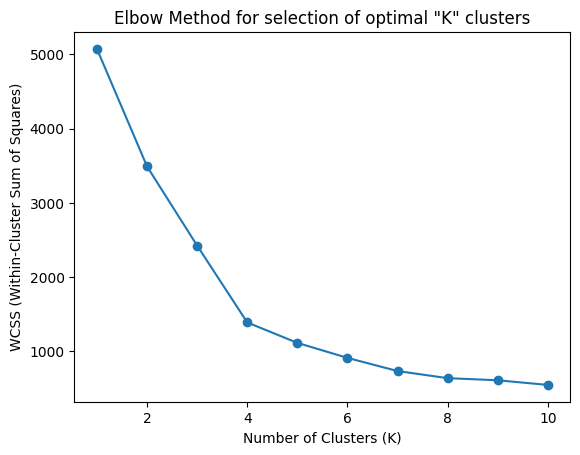

In [17]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.savefig('main/PCA_elbow_method.png')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.3610259491095283
For n_clusters = 3, the average silhouette score is: 0.43167346753871405
For n_clusters = 4, the average silhouette score is: 0.48318577030271553
For n_clusters = 5, the average silhouette score is: 0.5066423238188168
For n_clusters = 6, the average silhouette score is: 0.48623047543721926
For n_clusters = 7, the average silhouette score is: 0.45679874268776444


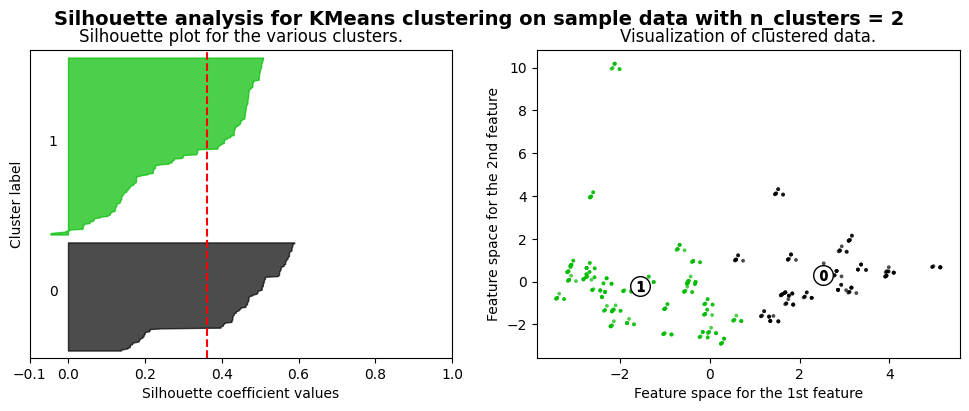

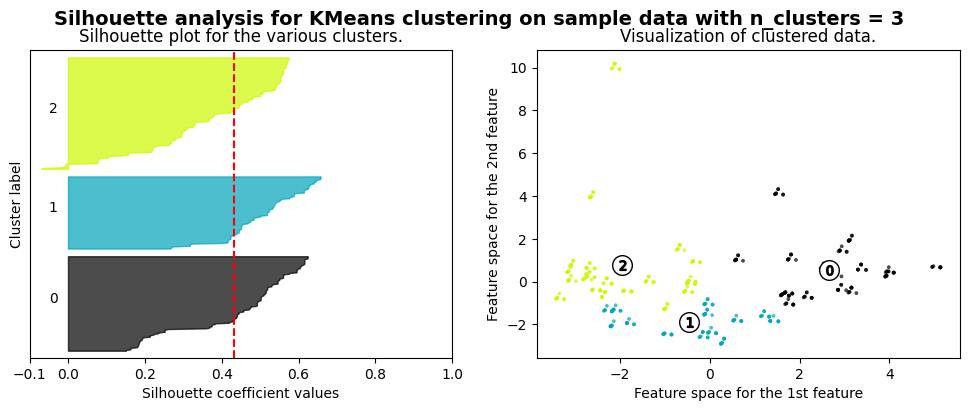

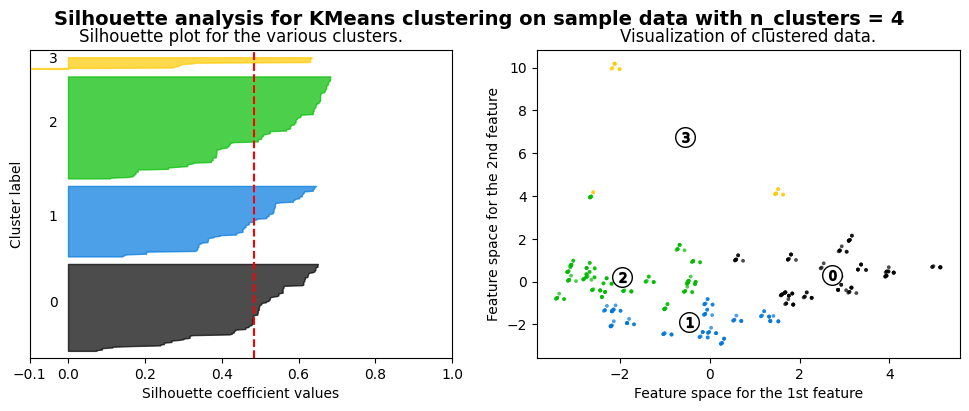

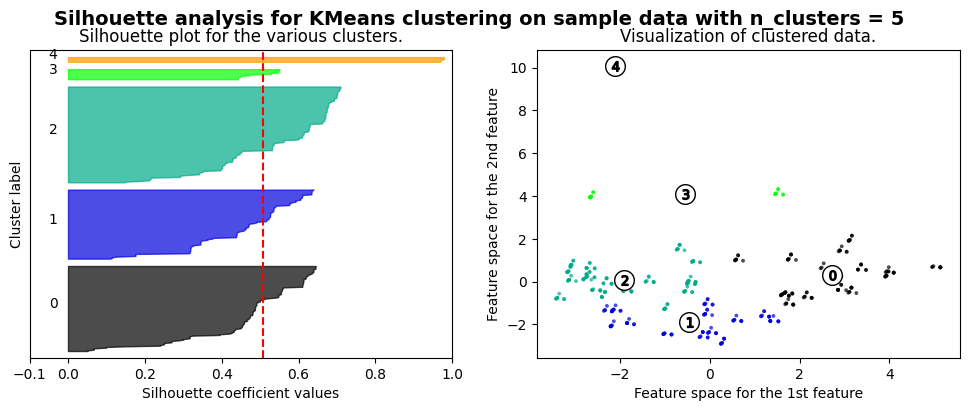

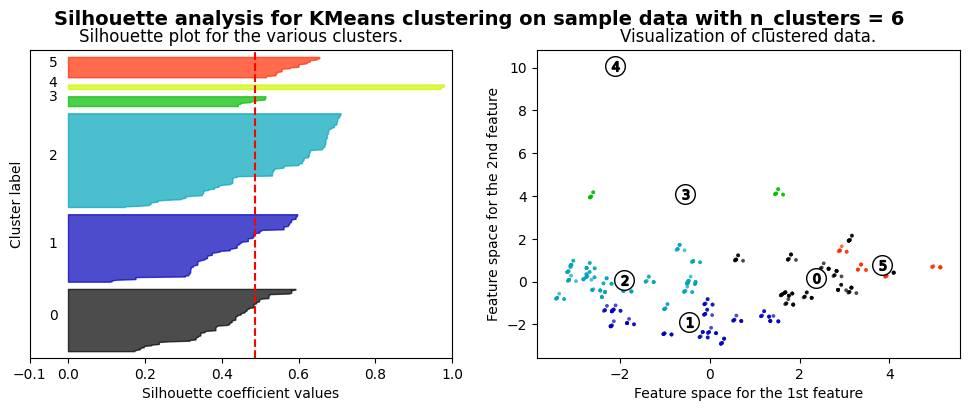

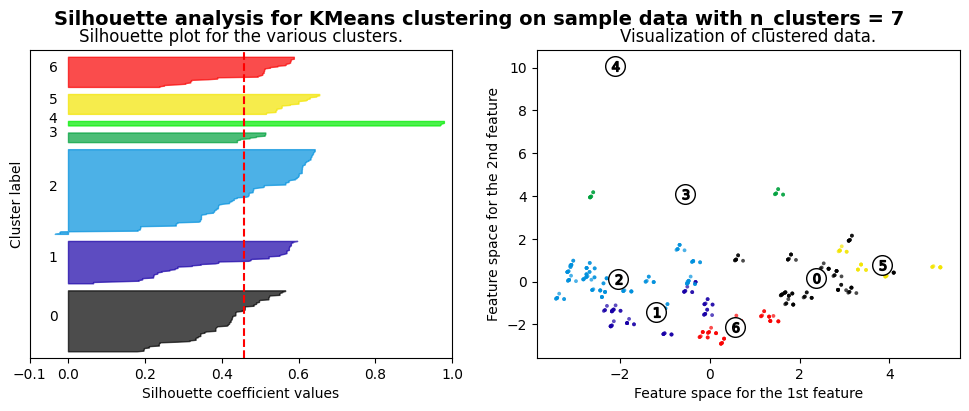

In [18]:

import os

output_dir = 'main/'
os.makedirs(output_dir, exist_ok=True)

# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(pca_features) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(pca_features)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_features[:, 0], pca_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_features)

In [20]:
cluster_labels

array([2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,

In [21]:

# Compute the explained variance ratio
explained_variance_ratio = np.var(pca_features, axis=0) / np.sum(np.var(pca_features, axis=0))

# Print the explained variance ratio for each principal component
print('Explained variation per principal component: {}'.format(explained_variance_ratio))


Explained variation per principal component: [0.41006039 0.32325339 0.26668621]


In [22]:
import plotly.io as pio

In [23]:
pip install kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB 262.6 kB/s eta 0:04:12
   ---------------------------------------- 0.1/65.9 MB 409.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/65.9 MB 1.0 MB/s eta 0:01:04
   ---------------------------------------- 0.5/65.9 MB 2.1 MB/s eta 0:00:32
    --------------------------------------- 1.3/65.9 MB 4.6 MB/s eta 0:00:15
   - -------------------------------------- 2.5/65.9 MB 7.2 MB/s eta 0:00:09
   - -------------------------------------- 3.1/65.9 MB 7.9 MB/s eta 0:00:08
   -- ------------------------------------- 4.1/65.9 MB 9.5 MB/s eta 0:00:07
   --- ------------------------------------ 5.3/65.9 MB 10.9 MB/s eta 0:00:06
   --- ------------------------------------ 6.3/65.9 MB 11.9 MB/s eta 0:00:05
   ---- ------

In [24]:
# Image will be displayed in the readme file as well
import plotly.express as px

# Scatter plot of data points
fig = px.scatter(x=pca_features[:, 0], y=pca_features[:, 1], color=cluster_labels, opacity=0.5, labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2'}, title='K-Means Clustering with Centroids', template='plotly_white')

# Scatter plot of centroids
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(symbol='diamond', size=10, color='red'), name='Centroids')
fig.update_layout(width=700)

fig.show()

In [25]:
loadings = pca.components_

# Absolute loadings
abs_loadings = np.abs(loadings)

# Identify important features for each principal component
n_top_features = 24  # Number of top features to display
for i, component in enumerate(abs_loadings):
    top_indices = np.argsort(component)[::-1][:n_top_features]
    top_features = [list(encoded_data.columns)[index] for index in top_indices]
    print(f"Principal Component {i+1}: Top {n_top_features} features - {top_features}")

Principal Component 1: Top 24 features - ['ethnicity_non hispanic', 'ethnicity_hispanic', 'marital_status_single', 'language_english', 'language_both', 'income', 'marital_status_married', 'employment_Retired', 'employment_Student', 'race_white', 'marital_status_widowed', 'education_Master', 'gender_male', 'race_undisclosed', 'race_Mexican', 'gender_female', 'education_undisclosed', 'race_black', 'race_native american', 'employment_Self employed', 'education_less than high school', 'marital_status_divorced', 'education_Associate', 'age']
Principal Component 2: Top 24 features - ['disability_undisclosed', 'disability_i do not have a disability', 'race_Puerto Rican ', 'gender_non binary', 'employment_Employed Full time', 'marital_status_divorced', 'language_spanish', 'language_both', 'education_less than high school', 'employment_Self employed', 'race_Mexican', 'employment_Employed Part time', 'education_Associate', 'race_native american', 'ethnicity_non hispanic', 'ethnicity_hispanic', '

In [26]:
loadings

array([[ 0.08125834,  0.22424872, -0.14334604,  0.16091059, -0.05771507,
        -0.34316028,  0.34316028,  0.0077757 , -0.15359691, -0.05771507,
         0.04900266,  0.12877884, -0.02723677, -0.10950216, -0.16001483,
         0.19267914, -0.08454666,  0.06104239,  0.03910736, -0.05867347,
         0.17435593, -0.0937461 ,  0.13914971,  0.09268898,  0.22010622,
        -0.02624129, -0.32683572, -0.0187003 ,  0.18345297,  0.04712262,
        -0.07294759,  0.21689135,  0.10411379, -0.1988551 ,  0.03747726,
        -0.2688941 ,  0.26941265, -0.02685094,  0.04900266,  0.05207821,
        -0.05207821, -0.03064486, -0.01782077,  0.0010719 ,  0.04874402],
       [-0.09978476,  0.11246649, -0.1002662 ,  0.00080945,  0.35064776,
        -0.11599755,  0.11599755, -0.09792308, -0.14277427,  0.35064776,
        -0.03592686, -0.01373626, -0.06349803,  0.11600421,  0.01208013,
         0.00761751,  0.11848916,  0.01681217, -0.0635118 ,  0.01165914,
         0.02364329, -0.16908685,  0.02347394,  0.

In [27]:
encoded_data['Cluster'] = cluster_labels

In [28]:
encoded_data.columns

Index(['age', 'income', 'gender_female', 'gender_male', 'gender_non binary',
       'ethnicity_hispanic', 'ethnicity_non hispanic', 'race_Colombia',
       'race_Mexican', 'race_Puerto Rican ', 'race_asian', 'race_black',
       'race_multiracial', 'race_native american', 'race_undisclosed',
       'race_white', 'education_Associate', 'education_Bachelor',
       'education_Doctorate', 'education_High School', 'education_Master',
       'education_less than high school', 'education_undisclosed',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_separated', 'marital_status_single',
       'marital_status_undisclosed', 'marital_status_widowed',
       'employment_Employed Full time', 'employment_Employed Part time',
       'employment_Retired', 'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'language_both', 'language_english',
       'language_spanish', 'language_undisclosed',
       'disability_i do not have a disabilit

## Clustering Analysis

In [44]:
data = pd.read_excel('Datasets/Dataset_w_labels.xlsx')
hierarchical_data =  pd.read_excel('Datasets/hierarchical_clusters.xlsx')

In [45]:
# Replace the contents of the 'disability' column
data['disability'] = data['disability'].replace({'i do not have a disability': 'No',
                                                 'i have a disability': 'Yes'})
# Replace the contents of the 'disability' column
hierarchical_data['disability'] = hierarchical_data['disability'].replace({'i do not have a disability': 'No',
                                                 'i have a disability': 'Yes'})

In [31]:
data.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice,Cluster
0,45-54,female,non hispanic,native american,High School,undisclosed,25000 - 49999,Employed Part time,both,No,Persuasive,2
1,18-24,male,hispanic,white,High School,single,Less than 25000,Employed Part time,english,No,Original,2
2,25-34,female,non hispanic,multiracial,Associate,single,Less than 25000,Student,english,No,Original,2


In [32]:
data.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'choice', 'Cluster'],
      dtype='object')

In [33]:
import plotly.express as px

# Define demographic traits
demographic_traits = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'choice']

# Group the data by the 'Cluster' column
cluster_group = data.groupby('Cluster')

# Initialize an empty list to store Plotly figures
figures = []

# Loop through each demographic trait
for trait in demographic_traits:
    # Count the unique occurrences of each item within the trait, grouped by cluster
    unique_counts = cluster_group[trait].value_counts().unstack(fill_value=0)

    # Convert the DataFrame to a Plotly figure
    fig = px.bar(unique_counts, barmode='stack', labels={'variable': 'Cluster', 'value': 'Count'}, 
                 title=f'{trait} by Cluster')
     
    fig.update_layout(width=600)  # Adjust the width as needed
    # Append the figure to the list
    figures.append(fig)
    fig.update_layout(title_x=0.5)

# Display the Plotly figures
for fig in figures:
    fig.show()
    

In [50]:
# Group the data by the 'Cluster' column
cluster_group_2 = data.groupby('Cluster')

# Initialize an empty list to store Plotly figures
figures = []
# Loop through each demographic trait
for trait in demographic_traits:
    # Count the unique occurrences of each item within the trait, grouped by cluster
    unique_counts = cluster_group_2[trait].value_counts().unstack(fill_value=0)

    # Plot the bar chart using Matplotlib
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    unique_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.title(f'{trait} by Cluster')
    plt.legend(title=trait, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the plot
    plt.savefig('hierar-cluster-classification/'f'{trait}_by_Cluster.png')  # Save the figure as a PNG image
    plt.close()  # Close the figure to free up memory


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Hierarchical Clustering

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

### Agglomerative clustering with non-pca data

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Iterate over each distance metric
for metric in distance_metrics:
    if metric == 'euclidean':
        linkage_method = 'ward'
    elif metric == 'manhattan':
        linkage_method = 'average'  
    else:
        linkage_method = 'average' 
        
    model = AgglomerativeClustering(n_clusters=3, metric=metric, linkage=linkage_method)
    
    # Fit the model to the data
    clusters = model.fit_predict(encoded_data)
    
    # Calculate silhouette score
    silhouette = silhouette_score(encoded_data, clusters)
    
    # Print silhouette score
    print(f"Clustering with {metric} metric has silhouette score: {silhouette}")

Clustering with euclidean metric has silhouette score: 0.22459457362519303
Clustering with manhattan metric has silhouette score: 0.1716104666259733
Clustering with cosine metric has silhouette score: 0.17454448686525076


### Clustering with PCA data

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Iterate over each distance metric
for metric in distance_metrics:
   
    if metric == 'euclidean':
        linkage_method = 'ward'  
    elif metric == 'manhattan':
        linkage_method = 'average'  
    else:
        linkage_method = 'average'  
        
    model = AgglomerativeClustering(n_clusters=3, metric=metric, linkage=linkage_method)
    
    # Fit the model to the data
    clusters = model.fit_predict(pca_features)
    
    # Calculate silhouette score
    silhouette = silhouette_score(pca_features, clusters)
    
    # Print silhouette score
    print(f"Clustering with {metric} metric has silhouette score: {silhouette}")

Clustering with euclidean metric has silhouette score: 0.4122677061297526
Clustering with manhattan metric has silhouette score: 0.3891724464827688
Clustering with cosine metric has silhouette score: 0.4092643585104562


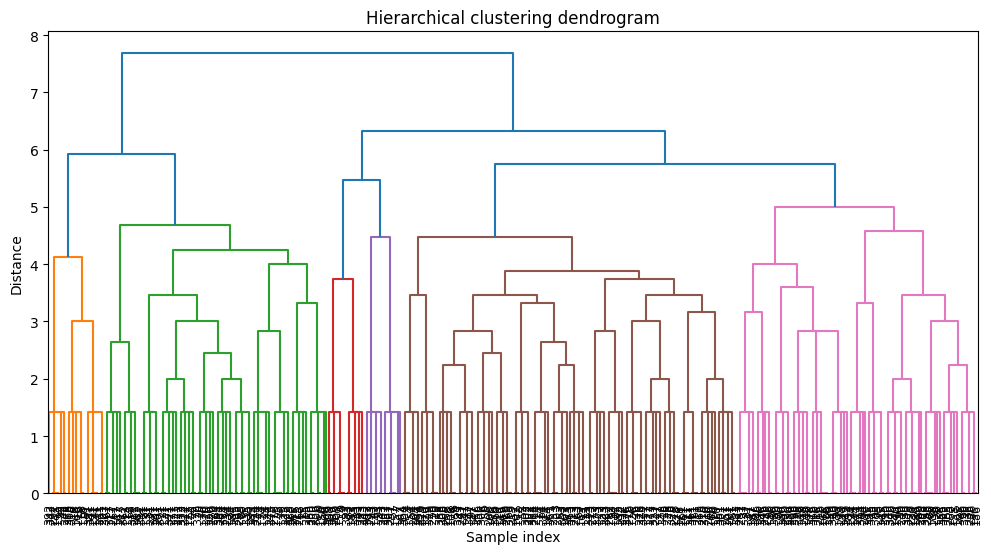

In [38]:


model = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='cosine')
clusters = model.fit_predict(encoded_data)

# linkage matrix
linkage_matrix = linkage(encoded_data, method='complete')

# plot dendrogram
plt.figure(figsize=(12, 6))
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical clustering dendrogram')
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.savefig('main/dendrogram.png')
plt.show()

In [39]:
import numpy as np

# Calculate the centroid of each cluster
centroids = np.array([encoded_data[clusters == i].mean(axis=0) for i in range(4)])
print('Centroids of each cluster:', centroids)

Centroids of each cluster: [[2.54166667 1.125      0.375      0.625      0.         0.54166667
  0.45833333 0.04166667 0.20833333 0.         0.         0.16666667
  0.04166667 0.08333333 0.         0.45833333 0.16666667 0.29166667
  0.04166667 0.20833333 0.04166667 0.20833333 0.04166667 0.04166667
  0.45833333 0.04166667 0.33333333 0.04166667 0.08333333 0.54166667
  0.20833333 0.04166667 0.125      0.04166667 0.04166667 0.16666667
  0.375      0.45833333 0.         0.95833333 0.04166667 0.28125
  0.24479167 0.20833333 0.265625   0.79166667]
 [0.4        0.         0.8        0.2        0.         0.86666667
  0.13333333 0.         0.13333333 0.         0.         0.
  0.06666667 0.06666667 0.2        0.53333333 0.4        0.2
  0.         0.13333333 0.         0.26666667 0.         0.
  0.         0.         1.         0.         0.         0.06666667
  0.33333333 0.         0.         0.53333333 0.06666667 0.66666667
  0.26666667 0.06666667 0.         1.         0.         0.33333333


In [40]:
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print('Cluster Sizes:', cluster_sizes)

Cluster Sizes: {0: 192, 1: 120, 2: 56, 3: 32}


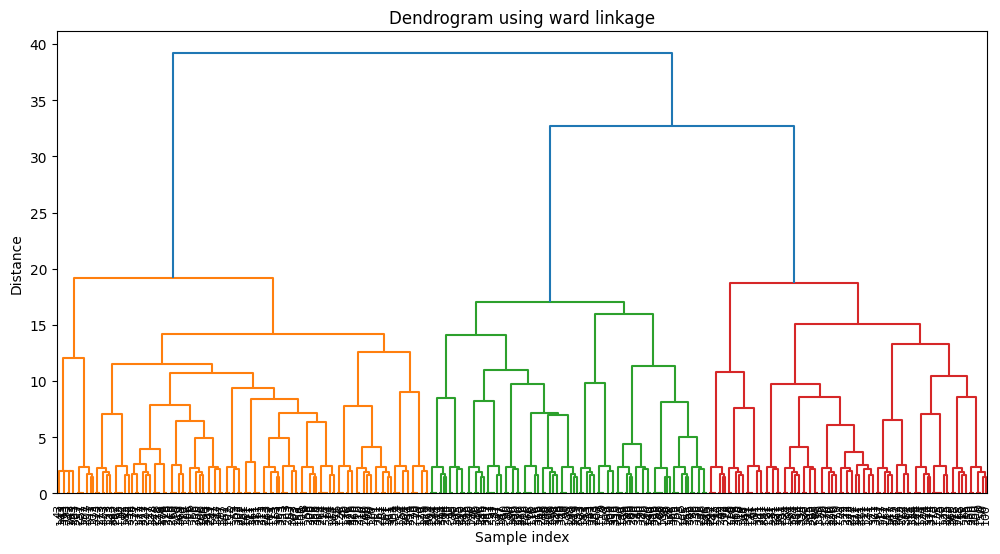

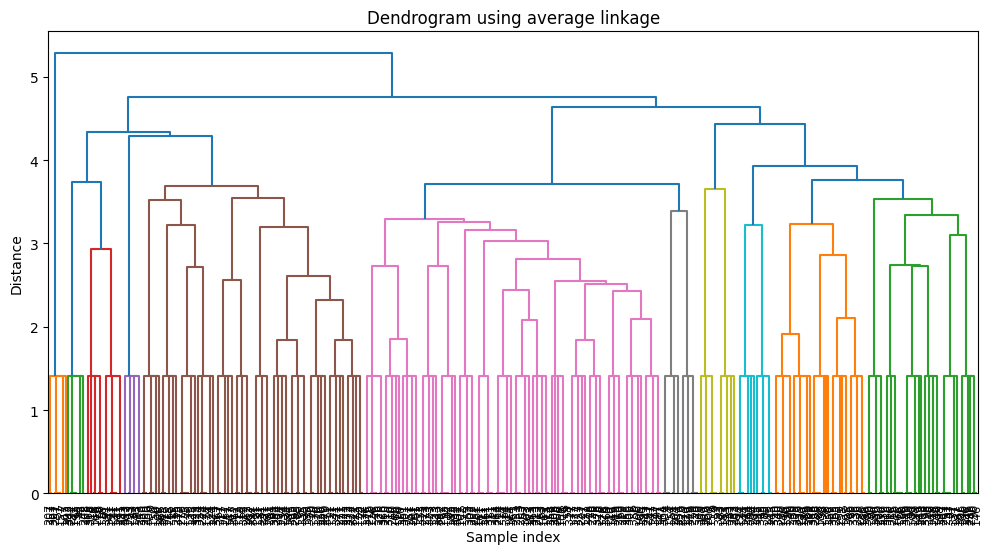

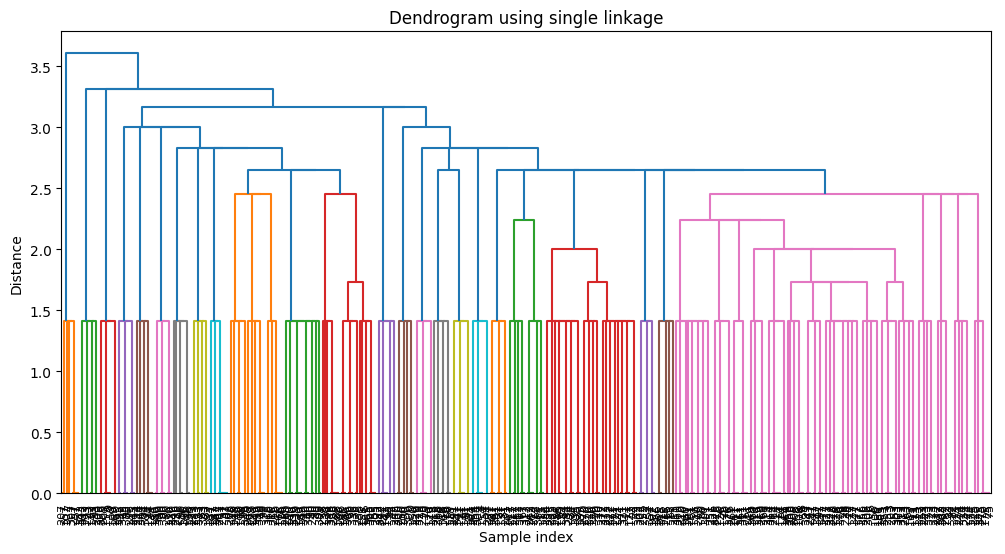

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

for method in ['ward', 'average', 'single']:
    linkage_matrix = linkage(encoded_data, method=method)
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Dendrogram using {method} linkage')
    dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.savefig(f'main/dendrogram_{method}.png')
    plt.show()

In [42]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model to the data
hierarchical_clusters = model.fit_predict(pca_features)

# Calculate silhouette score
silhouette = silhouette_score(pca_features, hierarchical_clusters)

# Print silhouette score
print(f"Clustering with Euclidean metric has silhouette score: {silhouette}")

# Get the cluster labels
print("Cluster labels:", hierarchical_clusters)

Clustering with Euclidean metric has silhouette score: 0.4122677061297526
Cluster labels: [0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 2 1 1 1 0 1 1 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1 0 0 0 0 2 1 0 2 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1 0 0 0 0 2 1 0 2 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1
 1 0 1 1 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1]


C:\Users\sotoe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [51]:
# Loop through each demographic trait
for trait in demographic_traits:
    # Count the unique occurrences of each item within the trait, grouped by cluster
    unique_counts = cluster_group[trait].value_counts().unstack(fill_value=0)

    # Plot the bar chart using Matplotlib
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    unique_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.title(f'{trait} by Cluster')
    plt.legend(title=trait, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the plot
    plt.savefig('kmeans-cluster-classification/'f'{trait}_by_Cluster.png')  # Save the figure as a PNG image
    plt.close()  # Close the figure to free up memory


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## TSNE

In [43]:
import plotly.express as px
from sklearn.manifold import TSNE

# Assuming 'encoded_data' is your dataframe containing the data points

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform data points using t-SNE
tsne_features = tsne.fit_transform(encoded_data.drop('Cluster', axis=1))  # Assuming you already added the 'Cluster' column

# Add t-SNE features to the dataframe
encoded_data['TSNE1'] = tsne_features[:, 0]
encoded_data['TSNE2'] = tsne_features[:, 1]

# Plot the distribution using Plotly
fig = px.scatter(encoded_data, x='TSNE1', y='TSNE2', color='Cluster', 
                 color_continuous_scale='viridis', 
                 labels={'TSNE1': 't-SNE Component 1', 'TSNE2': 't-SNE Component 2'},
                 title='t-SNE Visualization with Cluster Labels')
fig.update_layout(width=600)
fig.show()


